# Parametric Koopman Learning Tests on Duffing Oscillator

In [1]:

import PKoopmanDL as pkdl
import numpy as np
import matplotlib.pyplot as plt
import torch

config_file = "paramkoopman.json"
tmp_func = lambda x: x
observable_func = pkdl.ObservableFunction(tmp_func, 2)
solver = pkdl.ParamKoopmanDLSolverWrapper(config_file)
solver.setup(observable_func)
K = solver.solve()
koopman_dynamics = pkdl.KoopmanDynamics(K, solver.dictionary, [0,1], 2)

2024-11-28 16:39:38,985 PKoopmanDL: [INFO] [ParamKoopmanDataSet] Start generating data...
2024-11-28 16:39:39,012 PKoopmanDL: [INFO] [ParamKoopmanDataSet] Start generating trajectories...
Generating trajectories: 100%|██████████| 19/19 [00:00<00:00, 22.33it/s]
2024-11-28 16:39:39,867 PKoopmanDL: [INFO] [ParamKoopmanDataSet] Start generating labels...
2024-11-28 16:39:40,212 PKoopmanDL: [INFO] [ParamKoopmanDataSet] Data generated.
2024-11-28 16:39:40,223 PKoopmanDL: [INFO] [ParamKoopmanDLSolver] Solving...
Training: 100%|██████████| 20/20 [00:57<00:00,  2.89s/it, train_loss=6.58e-03, val_loss=6.26e-03]


## Plot

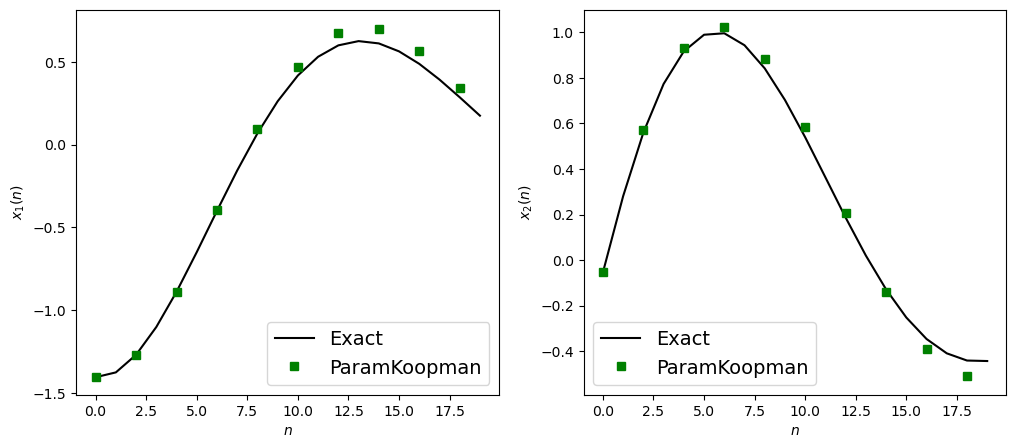

In [2]:
# predict
param = torch.tensor([[0.5, 1.0, 0.0]]).detach()
dataset_predict = pkdl.KoopmanDataSet(solver.dynamics)
dataset_predict.generate_data(1, solver.traj_len, solver.x_min, solver.x_max, param)
x0 = torch.unsqueeze(dataset_predict.data_x[0], dim=0)
p = koopman_dynamics.traj(x0, param, solver.traj_len)
x_est_traj = p[0, :, :].detach().numpy()

fig, (ax1, ax2) = plt.subplots(1, 2, sharey=False, figsize=(12,5))  
t_grid = np.arange(0, solver.traj_len)
x_traj = solver.dynamics.traj(x0, param, solver.traj_len)[0, :, :].detach().numpy()
ax1.plot(t_grid, x_traj[:,0], 'k-', label='Exact', markevery=2)
ax1.plot(t_grid, x_est_traj[:,0], 'gs', label='ParamKoopman', markevery=2)

ax2.plot(t_grid, x_traj[:,1], 'k-', label='Exact', markevery=2)
ax2.plot(t_grid, x_est_traj[:,1], 'gs', label='ParamKoopman', markevery=2)

ax1.set_xlabel(r"$n$")
ax1.set_ylabel(r"$x_{1}(n)$")
ax1.legend(loc='best',prop={'size':14})

ax2.set_xlabel(r"$n$")
ax2.set_ylabel(r"$x_{2}(n)$")
ax2.legend(loc='best',prop={'size':14})